In [473]:
%pylab inline

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
import numpy as np
mpl.rcParams['pdf.fonttype'] = 42
import scipy.stats
import sklearn.linear_model
import sklearn.ensemble

DATAPATH = "../data"

# Zscores file: chrom	start	end	ml_mu	ml_mu_se	pred_mu	predmu_se	zscore
zscores = pd.read_csv(os.path.join(DATAPATH, "autosomal_perlocus_zscores.bed"), sep="\t")
zscores["diff"] = zscores["ml_mu"]-zscores["pred_mu"]
zscores["length"] = zscores["end"]-zscores["start"]+1
zscores = zscores[zscores["ml_mu_se"]!=0]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Plot score distributions

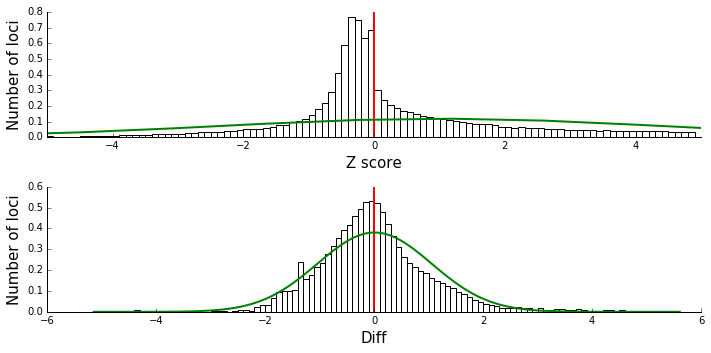

In [474]:
lb = -5
ub = 5
fig = plt.figure()
fig.set_size_inches((10, 5))

ax = fig.add_subplot(211)
ax.hist(zscores["zscore"], bins=np.arange(lb, ub, 0.1), edgecolor="black", color="white", normed=True);
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();
ax.set_xlabel("Z score", size=15)
ax.set_ylabel("Number of loci", size=15)
ax.axvline(x=0, linewidth=2, color="red")
# Fit normal
mu = np.mean(zscores["zscore"])
std = np.sqrt(np.var(zscores["zscore"]))
xvals = np.linspace(min(zscores["zscore"]), max(zscores["zscore"]), 100)
ax.set_xlim(left=lb, right=ub);
p = scipy.stats.norm.pdf(xvals, mu, std)
ax.plot(xvals, p, linewidth=2, color="green")

ax = fig.add_subplot(212)
ax.hist(zscores["diff"], bins=np.arange(lb, ub, 0.1),  edgecolor="black", color="white", normed=True );
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();
ax.set_xlabel("Diff", size=15)
ax.set_ylabel("Number of loci", size=15)
ax.axvline(x=0, linewidth=2, color="red")
# Fit normal
mu = np.mean(zscores["diff"])
std = np.sqrt(np.var(zscores["diff"]))
xvals = np.linspace(min(zscores["diff"]), max(zscores["diff"]), 100)
p = scipy.stats.norm.pdf(xvals, mu, std)
ax.plot(xvals, p, linewidth=2, color="green")

fig.tight_layout()

# Zscores/diff by STR set

In [461]:
# Get zscores by STR set
boxdata = []
diffdata = []
labels = []
meandiffs = []
meanzs = []
for strset in ["eSTRs.bed", "lobSTR_ref_GRCh37_intergenic.bed", "lobSTR_ref_GRCh37_intron.bed", \
              "lobSTR_ref_GRCh37_5utr.bed", "lobSTR_ref_GRCh37_3utr.bed", \
              "lobSTR_ref_GRCh37_coding.bed", \
               "lobSTR_ref_GRCh37_missenseconstrained.bed",  \
              "lobSTR_ref_GRCh37_pLI.bed",  
              "lobSTR_ref_GRCh37_IDgenes.bed"]:
    label = strset.split(".bed")[0].split("_")[-1]
    if label == "IDgenes":
        names = ["chrom","start","end","gene"]
    else: names = ["chrom","start","end"]
    setdata = pd.read_csv(os.path.join(DATAPATH, strset), sep="\t", names=names)
    setdata = pd.merge(setdata, zscores, on=["chrom","start"]).drop_duplicates()
    setdata = setdata[setdata["ml_mu_se"]>0]
    print label, setdata.shape[0], np.mean(setdata["diff"]), scipy.stats.ttest_rel(setdata["ml_mu"], setdata["pred_mu"])
    meandiffs.append(np.mean(setdata["diff"]))
    meanzs.append(np.mean(setdata["zscore"]))
    boxdata.append(list(setdata["zscore"]))
    diffdata.append(list(setdata["ml_mu"]-setdata["pred_mu"]))
    labels.append(label)

eSTRs 1465 0.60532227754 Ttest_relResult(statistic=26.007781013200049, pvalue=6.6325032012086478e-123)
intergenic 126922 -0.060845654752 Ttest_relResult(statistic=-22.673175168091255, pvalue=1.388091272651142e-113)
intron 100101 -0.0466690123309 Ttest_relResult(statistic=-15.702388278336684, pvalue=1.6970210957981473e-55)
5utr 1209 -0.0530219879608 Ttest_relResult(statistic=-1.9581363828479257, pvalue=0.050443900577683914)
3utr 2170 -0.015256038332 Ttest_relResult(statistic=-0.77504661734185487, pvalue=0.43839659820702404)
coding 687 -0.266957706374 Ttest_relResult(statistic=-7.1808320556226297, pvalue=1.8076655193486877e-12)
missenseconstrained 137 -0.311215667485 Ttest_relResult(statistic=-3.6000745224685042, pvalue=0.00044465748203119685)
pLI 214 -0.290306981203 Ttest_relResult(statistic=-4.2773537707883431, pvalue=2.8558939146785469e-05)
IDgenes 34 -0.354088926384 Ttest_relResult(statistic=-2.3870707255216237, pvalue=0.022869773097703341)


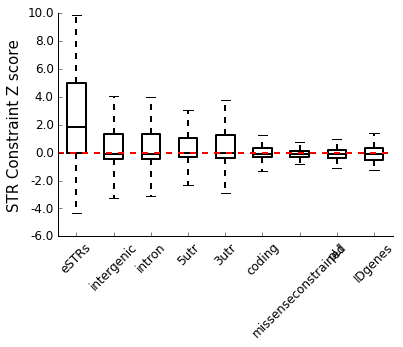

In [462]:
# Boxplot
fig = plt.figure()
ax = fig.add_subplot(111)
box = ax.boxplot(boxdata, sym="");
plt.setp(box['boxes'], color='black', linewidth=2)
plt.setp(box['whiskers'], color='black', linewidth=2)
plt.setp(box['medians'], color='black', linewidth=2)
plt.setp(box['caps'], color='black')
ax.axhline(y=0, linestyle="dashed", color="red",linewidth=2)
ax.set_ylabel("STR Constraint Z score", size=15)
ax.set_xticklabels(labels, size=12, rotation=45);
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

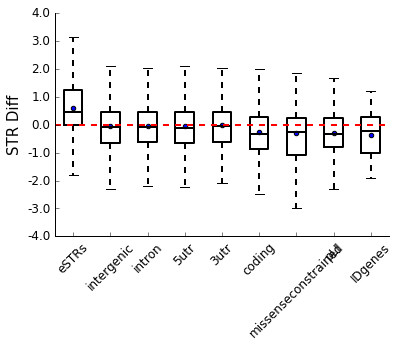

In [463]:
# Boxplot
fig = plt.figure()
ax = fig.add_subplot(111)
box = ax.boxplot(diffdata, sym="");
ax.scatter(ax.get_xticks(), meandiffs)
plt.setp(box['boxes'], color='black', linewidth=2)
plt.setp(box['whiskers'], color='black', linewidth=2)
plt.setp(box['medians'], color='black', linewidth=2)
plt.setp(box['caps'], color='black')
ax.axhline(y=0, linestyle="dashed", color="red",linewidth=2)
ax.set_ylabel("STR Diff", size=15)
ax.set_xticklabels(labels, size=12, rotation=45);
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

# STRs vs. SNP constraint scores

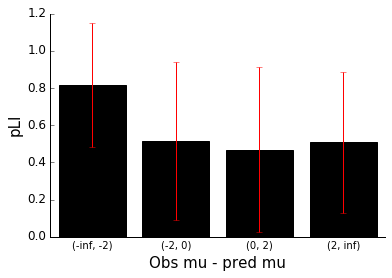

In [464]:
# Check out pLI scores
pLI = pd.read_csv(os.path.join(DATAPATH, "lobSTR_pLI_scores_coding.bed"), sep="\t", names=["chrom","start","end","pLI"])
pLI = pd.merge(pLI, zscores, on=["chrom","start","end"]).drop_duplicates()
scores = []
bins = [(-1*np.inf, -2), (-2, 0), (0, 2), (2, np.inf)]
col="diff"
#bins = [(-2,-1),(-1,0),(0,1)]
#col = "zscore"
for b in bins:
    d = pLI[(pLI[col]>=b[0]) & (pLI[col]<b[1]) & (pLI["ml_mu_se"]>0)]
    scores.append(list(d["pLI"]))
  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(len(scores)), map(lambda x: np.mean(x), scores), align="center", tick_label=bins, \
       color="black", ecolor="red",
      yerr=map(lambda x: np.sqrt(np.var(x)), scores));
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();
ax.set_xlabel("Obs mu - pred mu", size=15)
ax.set_ylabel("pLI", size=15)
ax.set_yticklabels(ax.get_yticks(), size=12);

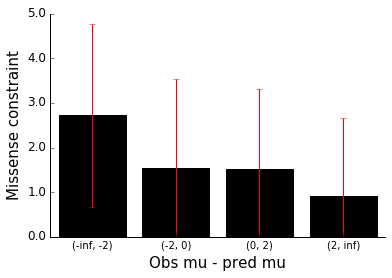

In [465]:
# Check out missense constraint scores
ms = pd.read_csv(os.path.join(DATAPATH, "lobSTR_missense_scores_coding.bed"), sep="\t", names=["chrom","start","end","ms"])
ms = pd.merge(ms, zscores, on=["chrom","start","end"]).drop_duplicates()
scores = []
bins = [(-1*np.inf, -2), (-2, 0), (0, 2), (2, np.inf)]
col="diff"
#bins = [(-2,-1),(-1,0),(0,1)]
#col = "zscore"
for b in bins:
    d = ms[(ms[col]>=b[0]) & (ms[col]<b[1])& (ms["ml_mu_se"]>0)]
    scores.append(list(d["ms"]))
  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(len(scores)), map(lambda x: np.mean(x), scores), align="center", tick_label=bins, \
       color="black", ecolor="red",
      yerr=map(lambda x: np.sqrt(np.var(x)), scores));
ax.set_ylim(bottom=0, top=5);
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();
ax.set_xlabel("Obs mu - pred mu", size=15)
ax.set_ylabel("Missense constraint", size=15)
ax.set_yticklabels(ax.get_yticks(), size=12);

# Constraint by amino acid

In [475]:
# Check out ID/autism genes
strset = "lobSTR_ref_GRCh37_IDgenes.bed"
setdata = pd.read_csv(os.path.join(DATAPATH, strset), sep="\t", names=["chrom","start","end","gene"])
setdata = pd.merge(setdata, zscores, on=["chrom","start"]).drop_duplicates()
setdata = setdata[setdata["ml_mu_se"]>0]
setdata.sort("diff").head()

,chrom,start,end_x,gene,end_y,ml_mu,ml_mu_se,pred_mu,predmu_se,zscore,diff,length
24,2,50574009,50574039,NRXN1,50574039,-5.950256,1.447669,-4.031460,0.049544,-1.873357,-1.918796,31
84,11,65838045,65838090,PACS1,65838090,-7.674292,75.923067,-5.850908,0.021108,-0.033964,-1.823384,46
42,5,92920821,92920844,NR2F1-AS1,92920844,-7.674279,11.337342,-6.015228,0.029502,-0.206948,-1.659052,24
43,5,92920821,92920844,NR2F1,92920844,-7.674279,11.337342,-6.015228,0.029502,-0.206948,-1.659052,24
97,19,13319694,13319722,CACNA1A,13319722,-6.052147,2.078686,-4.437791,0.038382,-1.098124,-1.614356,29
